### 0. Importación de librerías y carga de datos

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook
version = 1

import pandas as pd
import glob

# Specify the path to the directory containing your Excel files
excel_files_path = f'../data/2023-24/version{version}/anteriores/*.xlsx'

# Get a list of all Excel files in the specified directory
excel_files = glob.glob(excel_files_path)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each Excel file and read it into a DataFrame
for excel_file in excel_files:
    df = pd.read_excel(excel_file)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
print(data)

                  Date     HomeTeam         AwayTeam  HG  AG   HxG   AxG  HP  \
0     27.12.2023 12:30    St. Lieja      St. Truiden   1   1  0.27  1.02  48   
1     26.12.2023 14:45  Club Brujas  Royale Union SG   1   1  1.71  0.83  60   
2     26.12.2023 12:30     Westerlo             RWDM   3   0  1.97  0.98  49   
3     26.12.2023 10:00     Kortrijk             Gent   0   2  0.54  2.10  30   
4     26.12.2023 10:00       Leuven            Eupen   3   0  1.83  0.98  47   
...                ...          ...              ...  ..  ..   ...   ...  ..   
1112  13.08.2023 09:30      Rio Ave           Chaves   2   0  3.53  0.26  69   
1113  12.08.2023 14:30  Sporting CP           Vizela   3   2  1.61  0.26  59   
1114  12.08.2023 12:00      Farense         Casa Pia   0   3   NaN   NaN  46   
1115  12.08.2023 09:30  Gil Vicente     Portimonense   5   0  1.17  0.65  58   
1116  11.08.2023 14:15     SC Braga        Famalicao   1   2  0.89  0.59  59   

      AP  HTS  ...     AA    HDA   ADA 

### 1. Entendimiento de los datos

In [3]:
# Se revisa la forma general de los datos cargados
data.shape

(1117, 50)

In [4]:
# Se muestra una pequeña muestra de los datos
data.head()

,Date,HomeTeam,AwayTeam,HG,AG,HxG,AxG,HP,AP,HTS,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
0,27.12.2023 12:30,St. Lieja,St. Truiden,1,1,0.27,1.02,48,52,11,...,100.0,44.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,26.12.2023 14:45,Club Brujas,Royale Union SG,1,1,1.71,0.83,60,40,9,...,108.0,54.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,26.12.2023 12:30,Westerlo,RWDM,3,0,1.97,0.98,49,51,13,...,68.0,52.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3
3,26.12.2023 10:00,Kortrijk,Gent,0,2,0.54,2.10,30,70,7,...,148.0,31.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,-2
4,26.12.2023 10:00,Leuven,Eupen,3,0,1.83,0.98,47,53,18,...,76.0,55.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,3


In [5]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
data.dtypes

Date          object
HomeTeam      object
AwayTeam      object
HG             int64
AG             int64
HxG          float64
AxG          float64
HP             int64
AP             int64
HTS            int64
ATS            int64
HSI            int64
ASI            int64
HSO            int64
ASO            int64
HBS          float64
ABS          float64
HFK          float64
AFK          float64
HC             int64
AC             int64
HOFF           int64
AOFF           int64
HTI          float64
ATI          float64
HGS            int64
AGS            int64
HF             int64
AF             int64
HRC            int64
ARC            int64
HYC          float64
AYC          float64
HTP          float64
ATP          float64
HPC          float64
APC          float64
HT           float64
AT           float64
HA           float64
AA           float64
HDA          float64
ADA          float64
HClC         float64
AClC         float64
HCrC         float64
ACrC         float64
HDC          

In [6]:
# Se hace una decripción de los datos
data.describe()

,HG,AG,HxG,AxG,HP,AP,HTS,ATS,HSI,ASI,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
count,1117.000000,1117.000000,1040.000000,1040.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,...,1116.000000,1116.000000,1116.000000,154.000000,154.000000,98.000000,98.000000,50.000000,50.000000,1117.000000
mean,1.582811,1.241719,1.447077,1.129452,51.274843,48.725157,14.249776,11.651746,5.011638,4.127126,...,97.969534,52.427419,43.619176,17.175325,22.019481,4.602041,3.928571,110.460000,109.460000,0.341092
std,1.318326,1.164259,0.877083,0.764296,11.322125,11.322125,5.698465,4.958387,2.653335,2.420038,...,23.759689,19.896529,17.108390,8.229656,9.542112,2.924267,2.818386,4.234022,4.165995,1.849887
min,0.000000,0.000000,0.050000,0.000000,19.000000,16.000000,1.000000,1.000000,0.000000,0.000000,...,29.000000,12.000000,7.000000,2.000000,6.000000,0.000000,0.000000,104.000000,101.000000,-8.000000
25%,1.000000,0.000000,0.760000,0.560000,43.000000,40.000000,10.000000,8.000000,3.000000,2.000000,...,82.000000,38.000000,31.000000,11.000000,15.000000,3.000000,2.000000,107.000000,106.250000,-1.000000
50%,1.000000,1.000000,1.285000,1.000000,51.000000,49.000000,13.000000,11.000000,5.000000,4.000000,...,97.000000,50.000000,41.000000,16.000000,20.000000,4.000000,3.000000,110.000000,110.000000,0.000000
75%,2.000000,2.000000,1.942500,1.520000,60.000000,57.000000,18.000000,14.000000,7.000000,6.000000,...,113.250000,63.250000,53.000000,22.000000,27.000000,6.000000,5.000000,113.000000,112.000000,1.000000
max,7.000000,8.000000,6.410000,5.610000,84.000000,81.000000,38.000000,39.000000,18.000000,15.000000,...,174.000000,137.000000,113.000000,43.000000,59.000000,13.000000,15.000000,120.000000,119.000000,7.000000


### 2. Identificación de variables a utilizar

In [7]:
#selected_cols = ['HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS', 'HRC', 'ARC']
#selected_cols2 = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP',
#                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
#                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
#                 'HCrC', 'ACrC', 'HDC', 'ADC']
selected_cols = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP', 'HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS',
                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
                 'HCrC', 'ACrC', 'HDC', 'ADC']

### 3. Limpieza y preparación de datos

In [8]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Resultado", data["Resultado"])

In [9]:
# Se observa que no existen valores nulos en las variables
df_data.isnull().sum()

Resultado       0
HG              0
AG              0
HxG            77
AxG            77
HP              0
AP              0
HTS             0
ATS             0
HSI             0
ASI             0
HSO             0
ASO             0
HBS           341
ABS           341
HFK           150
AFK           150
HC              0
AC              0
HOFF            0
AOFF            0
HTI             5
ATI             5
HGS             0
AGS             0
HF              0
AF              0
HRC             0
ARC             0
HYC             3
AYC             3
HTP           333
ATP           333
HPC           673
APC           673
HT            658
AT            658
HA              1
AA              1
HDA             1
ADA             1
HClC          963
AClC          963
HCrC         1019
ACrC         1019
HDC          1067
ADC          1067
dtype: int64

In [10]:
#columns_to_drop = ['HBS', 'ABS']
columns_to_drop = ['HBS', 'ABS', 'HFK', 'AFK', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HClC', 'AClC',
                   'HCrC', 'ACrC', 'HDC', 'ADC']
df_data = df_data.drop(columns=columns_to_drop)

In [11]:
df_data.shape

(1117, 31)

In [12]:
df_data = df_data.dropna()
df_data.shape

(1031, 31)

In [13]:
df_data.head()
output_file = 'output.xlsx'
df_data.to_excel(output_file, index=False)

<Axes: >

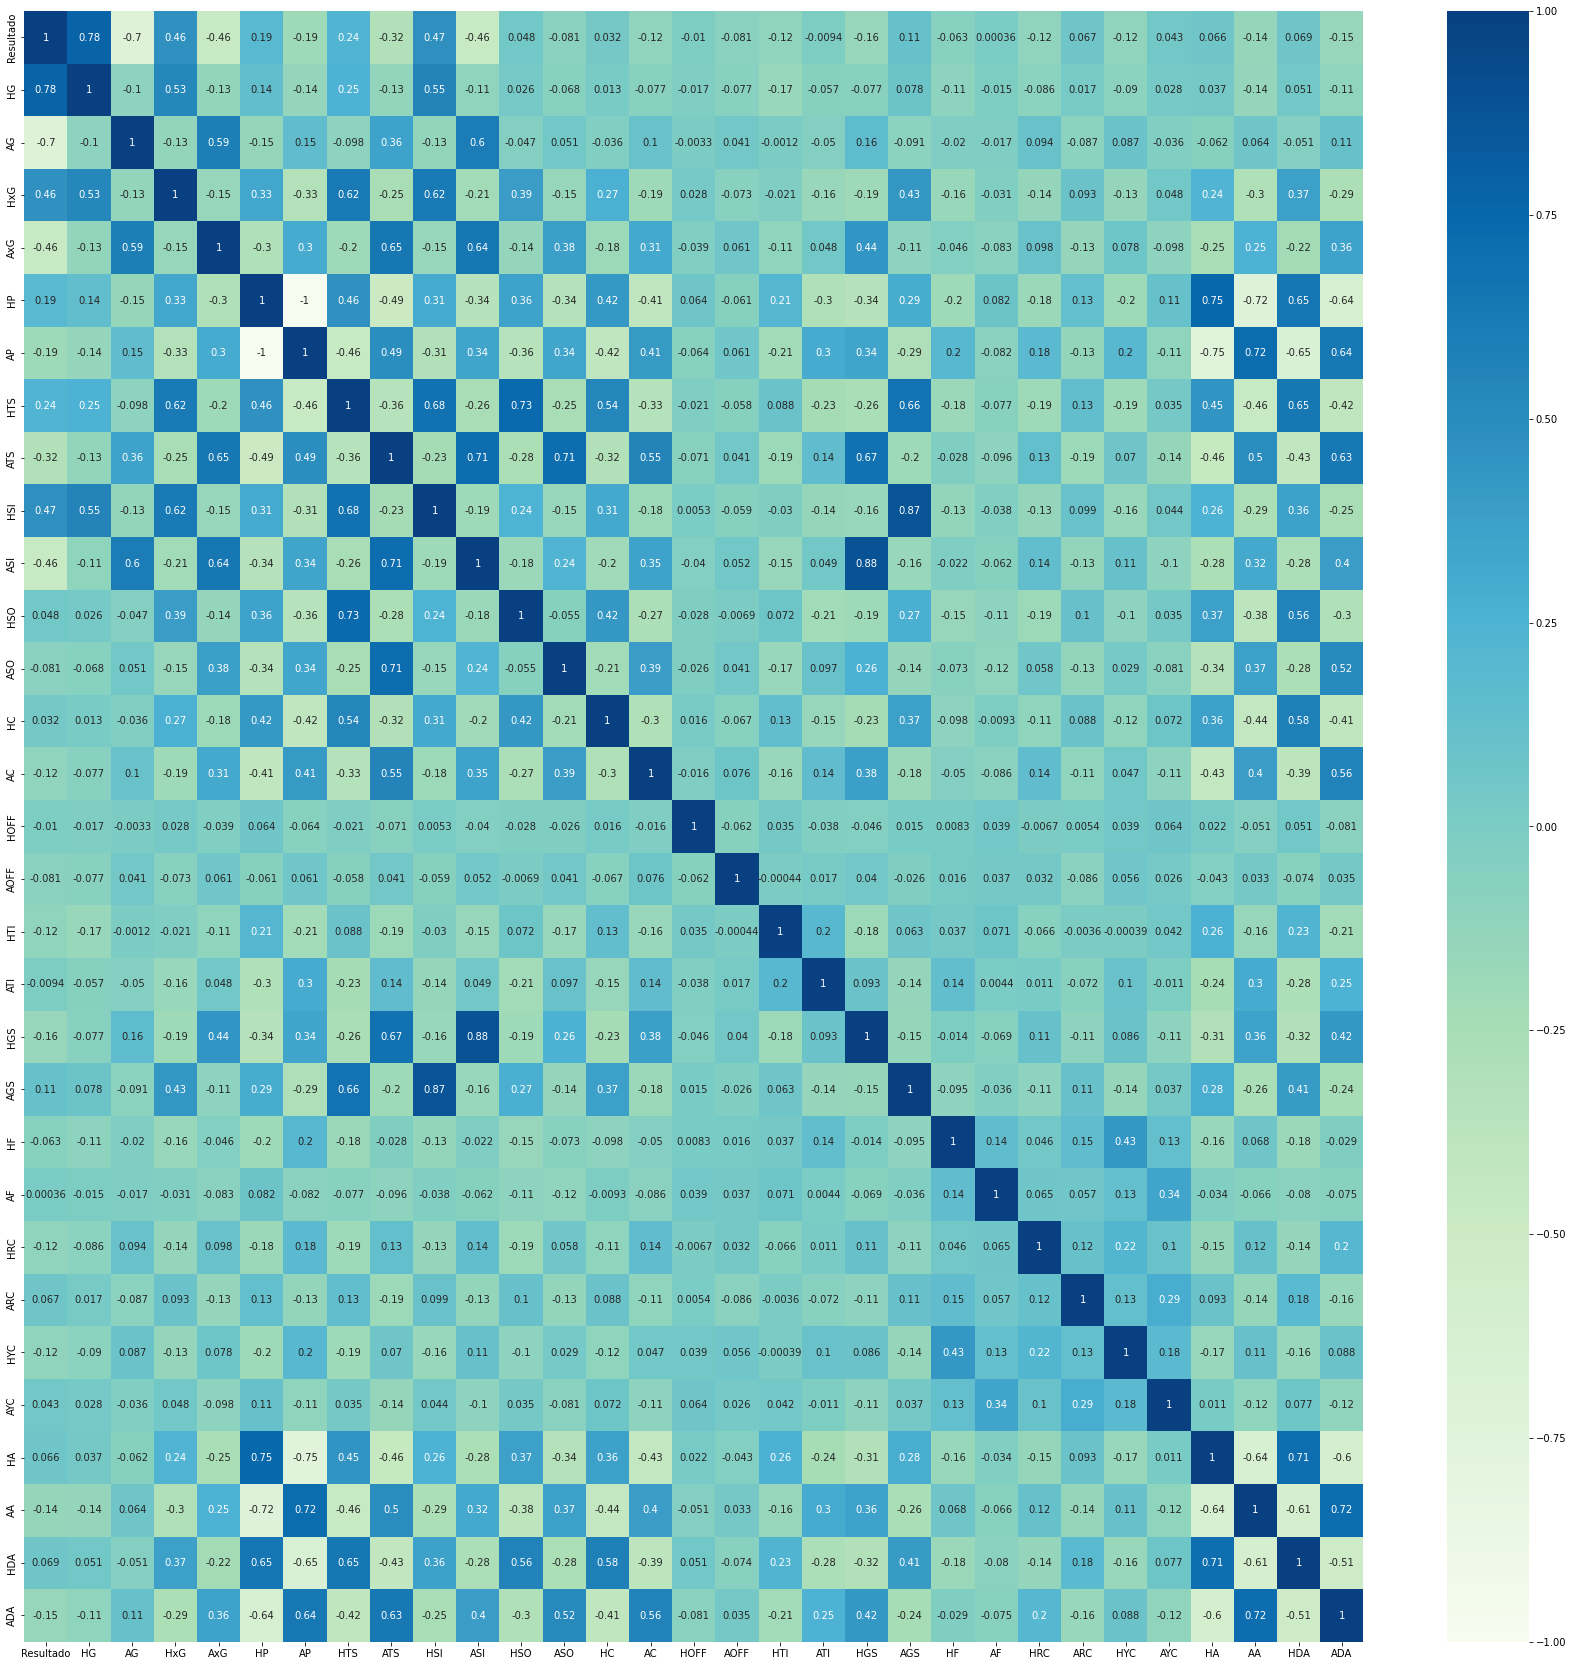

In [14]:
# Se revisa si la variable objetivo está correlacionada con otra variable
plt.figure(figsize =(30,30))
correlacion = df_data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

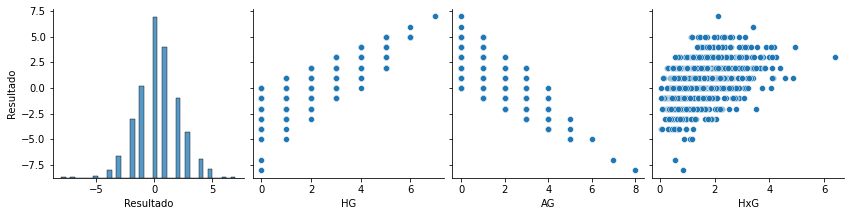

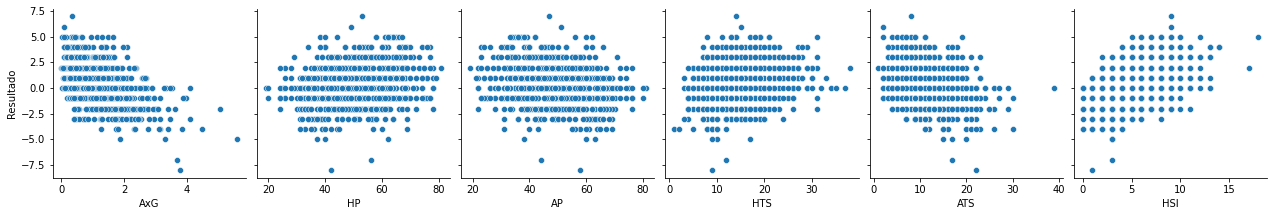

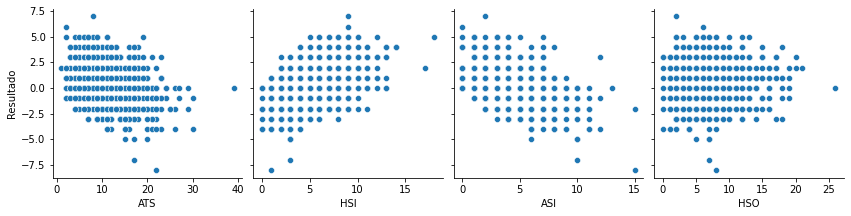

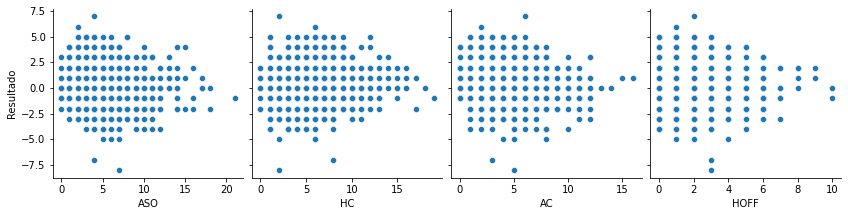

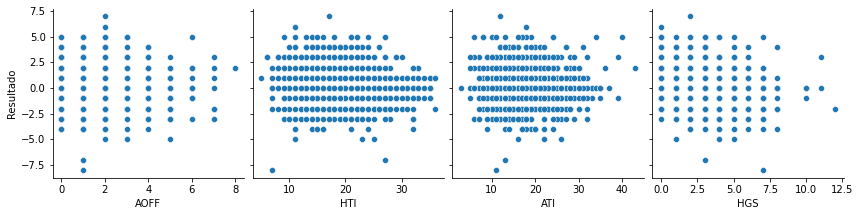

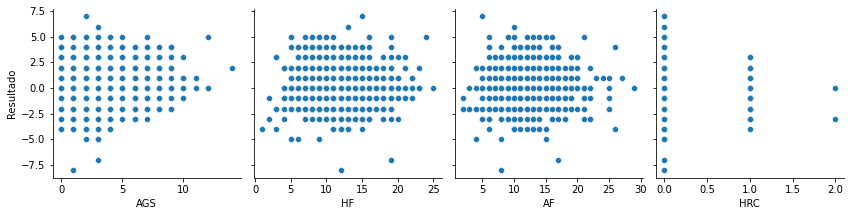

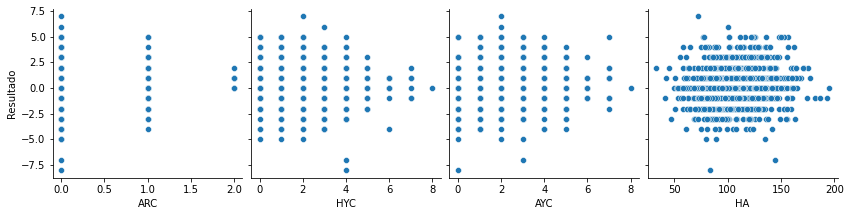

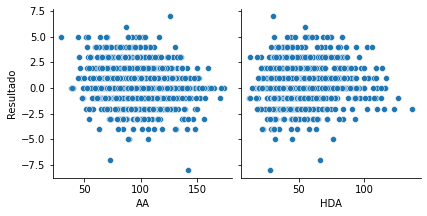

In [15]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[0:4], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[4:10], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[8:12], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[12:16], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[16:20], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[20:24], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[24:28], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[28:30], kind='scatter')

### 4. Modelamiento

In [16]:
columns_to_drop = ['HG', 'AG', 'HTS', 'ATS', 'AP']
df_data = df_data.drop(columns=columns_to_drop)

### 5. Construcción del modelo: Árbol de decisión

In [17]:
import numpy as np
import pandas as pd

from numpy import sqrt

import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

2023-12-28 16:55:26.181566: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 16:55:26.464450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 16:55:26.464631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 16:55:26.512020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 16:55:26.640186: I tensorflow/core/platform/cpu_feature_guar

In [18]:
df_data.head()

,Resultado,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,0,0.27,1.02,48,2,8,9,10,4,4,...,14,14,0,0,1.0,3.0,115.0,100.0,44.0,38.0
1,0,1.71,0.83,60,2,3,7,4,6,0,...,15,14,0,1,1.0,5.0,121.0,108.0,54.0,39.0
2,3,1.97,0.98,49,3,4,10,7,6,0,...,7,12,0,1,0.0,0.0,99.0,68.0,52.0,26.0
3,-2,0.54,2.10,30,3,9,4,11,4,5,...,9,10,0,0,1.0,1.0,70.0,148.0,31.0,65.0
4,3,1.83,0.98,47,7,6,11,8,7,3,...,6,15,0,0,2.0,2.0,98.0,76.0,55.0,41.0


In [19]:
import numpy as np
df_data['Resultado'] = np.where(df_data['Resultado'] > 0, 1, np.where(df_data['Resultado'] < 0, -1, 0))

In [20]:
df_data.value_counts(['Resultado'])

Resultado
 1           467
-1           300
 0           264
Name: count, dtype: int64

In [21]:
#Se procede a realizar la división de datos, en donde se asigna un 20% para los datos de test:
train, test = train_test_split(df_data, test_size=0.2, random_state=33)
train.head()

,Resultado,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
763,-1,0.37,2.47,46,3,4,2,6,2,4,...,13,8,0,0,1.0,2.0,109.0,72.0,47.0,32.0
1098,1,1.30,1.33,55,3,4,7,6,8,8,...,8,6,0,0,1.0,1.0,114.0,75.0,58.0,47.0
814,1,2.38,0.67,36,7,5,9,5,7,9,...,13,13,0,0,5.0,1.0,64.0,122.0,33.0,60.0
85,1,2.03,1.22,59,7,3,15,3,14,2,...,9,7,0,1,1.0,3.0,111.0,76.0,77.0,16.0
549,-1,1.40,1.07,51,5,3,6,8,4,5,...,11,7,0,0,1.0,3.0,101.0,119.0,36.0,32.0


In [22]:
X_n = train.drop(['Resultado'], axis=1)
Y = train['Resultado']
display(X_n.head())
Y.head()

,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
763,0.37,2.47,46,3,4,2,6,2,4,1,...,13,8,0,0,1.0,2.0,109.0,72.0,47.0,32.0
1098,1.30,1.33,55,3,4,7,6,8,8,2,...,8,6,0,0,1.0,1.0,114.0,75.0,58.0,47.0
814,2.38,0.67,36,7,5,9,5,7,9,1,...,13,13,0,0,5.0,1.0,64.0,122.0,33.0,60.0
85,2.03,1.22,59,7,3,15,3,14,2,3,...,9,7,0,1,1.0,3.0,111.0,76.0,77.0,16.0
549,1.40,1.07,51,5,3,6,8,4,5,2,...,11,7,0,0,1.0,3.0,101.0,119.0,36.0,32.0


763    -1
1098    1
814     1
85      1
549    -1
Name: Resultado, dtype: int64

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X_n)
display(pd.DataFrame(X, columns=X_n.columns))

Y = (Y - Y.mean())/Y.std()
display(pd.DataFrame(Y))

,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,-1.233987,1.772407,-0.478799,-0.795006,-0.016232,-1.197820,0.190543,-1.162305,-0.142805,-0.519719,...,0.304269,-1.040055,-0.332834,-0.357205,-0.726751,-0.283377,0.090739,-1.087216,-0.273294,-0.645114
1,-0.183615,0.266693,0.321826,-0.795006,-0.016232,0.089688,0.190543,0.758295,1.360979,0.072602,...,-0.967119,-1.534434,-0.332834,-0.357205,-0.726751,-0.962162,0.292056,-0.957643,0.282741,0.257491
2,1.036172,-0.605036,-1.368383,0.732889,0.401735,0.604691,-0.129228,0.438195,1.736925,-0.519719,...,0.304269,0.195892,-0.332834,-0.357205,1.998360,-0.962162,-1.721114,1.072329,-0.980974,1.039748
3,0.640870,0.121405,0.677660,0.732889,-0.434199,2.149700,-0.768769,2.678896,-0.894697,0.664924,...,-0.712841,-1.287245,-0.332834,2.472957,-0.726751,0.395409,0.171266,-0.914452,1.243164,-1.607892
4,-0.070672,-0.076715,-0.034007,-0.031059,-0.434199,-0.167813,0.830084,-0.522105,0.233141,0.072602,...,-0.204286,-1.287245,-0.332834,-0.357205,-0.726751,0.395409,-0.231368,0.942757,-0.829328,-0.645114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.810285,-1.371101,0.766618,1.496836,-1.270132,1.634697,-1.408310,0.118095,-0.894697,-1.112040,...,-0.204286,-1.287245,-0.332834,-0.357205,-0.045474,-1.640948,1.177851,-0.698498,0.434387,-1.367198
820,-1.222692,-0.076715,0.321826,-1.176980,0.819702,0.347190,-0.448998,0.438195,0.985033,-1.112040,...,-0.204286,0.195892,-0.332834,-0.357205,0.635804,3.110552,-0.311895,0.597230,-0.424939,0.317664
821,-0.398207,-0.208796,-0.656716,-0.031059,0.401735,-0.682817,-0.129228,-0.842205,-1.270643,-1.112040,...,-0.204286,-0.298487,-0.332834,-0.357205,-0.045474,-0.283377,-1.278216,1.245093,-1.233717,0.498185
822,-0.081966,-0.288044,-1.101508,-1.558953,-0.434199,2.149700,0.190543,1.078395,0.609087,-1.112040,...,-0.967119,0.195892,-0.332834,-0.357205,-0.726751,-0.962162,-0.150841,0.813184,0.737678,0.979574


,Resultado
763,-1.388837
1098,0.975629
814,0.975629
85,0.975629
549,-1.388837
...,...
258,0.975629
59,-1.388837
730,-0.206604
645,-1.388837


### Modelo

In [24]:
model = Sequential(name="Mi_primer_MLP")

2023-12-28 16:55:28.625303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 16:55:29.039196: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 16:55:29.039230: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 16:55:29.047692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 16:55:29.047733: I external/local_xla/xla/stream_executor

In [25]:
model.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
model.add(Dense(3,activation='relu',name='Capa_Oculta'))
model.add(Dense(1,activation='linear',name='Capa_Salida'))

In [26]:
optimizer = tf.keras.optimizers.RMSprop(0.001) # Tasa de aprendizaje

model.compile(loss='mse', # Función de pérdida, mse en regresión, guia la red neuronal
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "Mi_primer_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta (Dense)         (None, 3)                 78        
                                                                 
 Capa_Salida (Dense)         (None, 1)                 4         
                                                                 
Total params: 82 (328.00 Byte)
Trainable params: 82 (328.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
history = model.fit(
    X,
    Y,
    batch_size=10,
    epochs=50 # Veces que se realiza el recorrido,
)

Epoch 1/50


2023-12-28 16:55:30.632243: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-28 16:55:30.987152: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f76860026e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-28 16:55:30.987179: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2023-12-28 16:55:31.008201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-28 16:55:31.039690: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1703800531.089313   85596 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 [==============================] - 1s 2ms/step - loss: 1.6620 - mae: 1.0522 - mse: 1.6620 - root_mean_squared_error: 1.2892
Epoch 2/50
83/83 [==============================] - 0s 2ms/step - loss: 1.2586 - mae: 0.9261 - mse: 1.2586 - root_mean_squared_error: 1.1219
Epoch 3/50
83/83 [==============================] - 0s 2ms/step - loss: 1.0489 - mae: 0.8548 - mse: 1.0489 - root_mean_squared_error: 1.0242
Epoch 4/50
83/83 [==============================] - 0s 2ms/step - loss: 0.9267 - mae: 0.8035 - mse: 0.9267 - root_mean_squared_error: 0.9627
Epoch 5/50
83/83 [==============================] - 0s 2ms/step - loss: 0.8544 - mae: 0.7712 - mse: 0.8544 - root_mean_squared_error: 0.9243
Epoch 6/50
83/83 [==============================] - 0s 2ms/step - loss: 0.8056 - mae: 0.7483 - mse: 0.8056 - root_mean_squared_error: 0.8976
Epoch 7/50
83/83 [==============================] - 0s 2ms/step - loss: 0.7664 - mae: 0.7293 - mse: 0.7664 - root_mean_squared_error: 0.8754
Epoch 8/50
83/83 [======

In [29]:
y_pred = model.predict(X, batch_size=1)

824/824 [==============================] - 1s 761us/step


In [30]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.19409
Mean Absolute Error (MAE): 0.34665
Root Mean Squared Error (RMSE): 0.44056


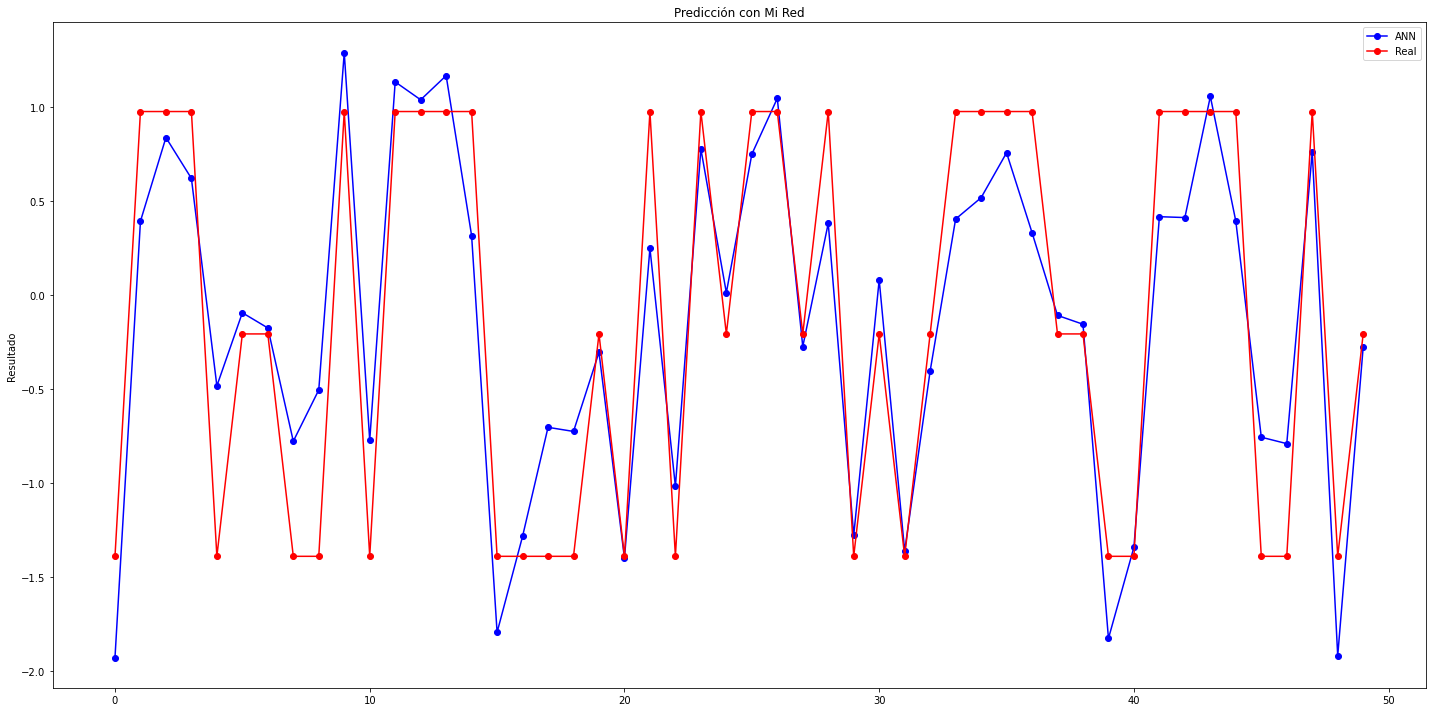

In [31]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, Y[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

### Búsqueda de Hiperparámetros

In [32]:
import shutil
import os

# Specify the path to the folder you want to delete
folder_path = './untitled_project'

# Check if the path exists before deleting
if os.path.exists(folder_path):
    # Use shutil.rmtree() to delete the folder and its contents
    shutil.rmtree(folder_path)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=33)
display(pd.DataFrame(X_val, columns=X_n.columns).head())
y_val

,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,2.018777,-0.340876,1.211410,1.114863,0.401735,1.634697,-0.768769,1.718596,-0.894697,-0.519719,...,1.067102,-0.298487,-0.332834,2.472957,1.317082,1.074195,0.654427,-0.871261,0.434387,-1.066329
1,-1.290458,2.366767,-0.122966,-1.940927,0.401735,-0.425315,0.190543,-0.842205,0.985033,0.072602,...,0.558547,0.195892,-0.332834,-0.357205,0.635804,0.395409,-0.311895,-0.223398,-0.172196,1.460963
2,-0.770920,-0.129548,-0.478799,-1.176980,0.401735,1.892199,-1.088539,0.438195,-1.270643,0.072602,...,0.558547,0.195892,-0.332834,-0.357205,-0.045474,0.395409,2.264963,-0.396161,0.383838,-0.284072
3,-1.222692,-0.076715,0.321826,-1.176980,0.819702,0.347190,-0.448998,0.438195,0.985033,-1.112040,...,-0.204286,0.195892,-0.332834,-0.357205,0.635804,3.110552,-0.311895,0.597230,-0.424939,0.317664
4,0.945817,-1.054109,-0.034007,1.878810,-1.270132,0.089688,-1.088539,-0.202005,-0.894697,0.664924,...,0.049991,-0.298487,-0.332834,-0.357205,-0.726751,0.395409,1.499958,0.510848,0.282741,2.002526


1056    0.975629
815    -1.388837
57     -1.388837
59     -1.388837
163     0.975629
          ...   
464    -0.206604
456     0.975629
186    -0.206604
623    -0.206604
987     0.975629
Name: Resultado, Length: 165, dtype: float64

In [34]:
def entrenarRed(hp):
    clf = Sequential(name='Mi_Red')
    neuronas = hp.Choice('neuronas', [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

    clf.add(Input(shape=(X.shape[1]), name='Capa_Entrada'))
    clf.add(Dense(neuronas,activation='relu',name='Capa_Oculta'))
    clf.add(Dense(1,activation='linear',name='Capa_Salida'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    clf.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', tf.keras.metrics.RootMeanSquaredError()])

    return clf

tuner = kt.RandomSearch(
    entrenarRed,
    objective="val_mse",
    seed=123,
    max_trials=19) # Numero de pruebas

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

tuner.search(X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=100,
    callbacks=[early_stopping]
)

best_model = tuner.get_best_models()[0]

Trial 19 Complete [00h 00m 28s]
val_mse: 0.2696812152862549

Best val_mse So Far: 0.2105802297592163
Total elapsed time: 00h 05m 46s


In [36]:
best_model.save('best_model_regressor.h5')
best_model.summary()

Model: "Mi_Red"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Oculta (Dense)         (None, 4)                 104       
                                                                 
 Capa_Salida (Dense)         (None, 1)                 5         
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/home/user/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 14 summary
Hyperparameters:
neuronas: 4
Score: 0.2105802297592163

Trial 18 summary
Hyperparameters:
neuronas: 8
Score: 0.2696812152862549

Trial 00 summary
Hyperparameters:
neuronas: 2
Score: 0.27314242720603943

Trial 10 summary
Hyperparameters:
neuronas: 5
Score: 0.28363868594169617

Trial 12 summary
Hyperparameters:
neuronas: 10
Score: 0.2894984483718872

Trial 09 summary
Hyperparameters:
neuronas: 3
Score: 0.29642337560653687

Trial 04 summary
Hyperparameters:
neuronas: 13
Score: 0.3130246102809906

Trial 06 summary
Hyperparameters:
neuronas: 7
Score: 0.3239588737487793

Trial 17 summary
Hyperparameters:
neuronas: 6
Score: 0.3398740291595459

Trial 15 summary
Hyperparameters:
neuronas: 17
Score: 0.3401983082294464


In [38]:
y_pred = best_model.predict(X, batch_size=1)

824/824 [==============================] - 1s 779us/step


In [39]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(Y,y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(Y,y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(Y,y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.14605
Mean Absolute Error (MAE): 0.28538
Root Mean Squared Error (RMSE): 0.38216


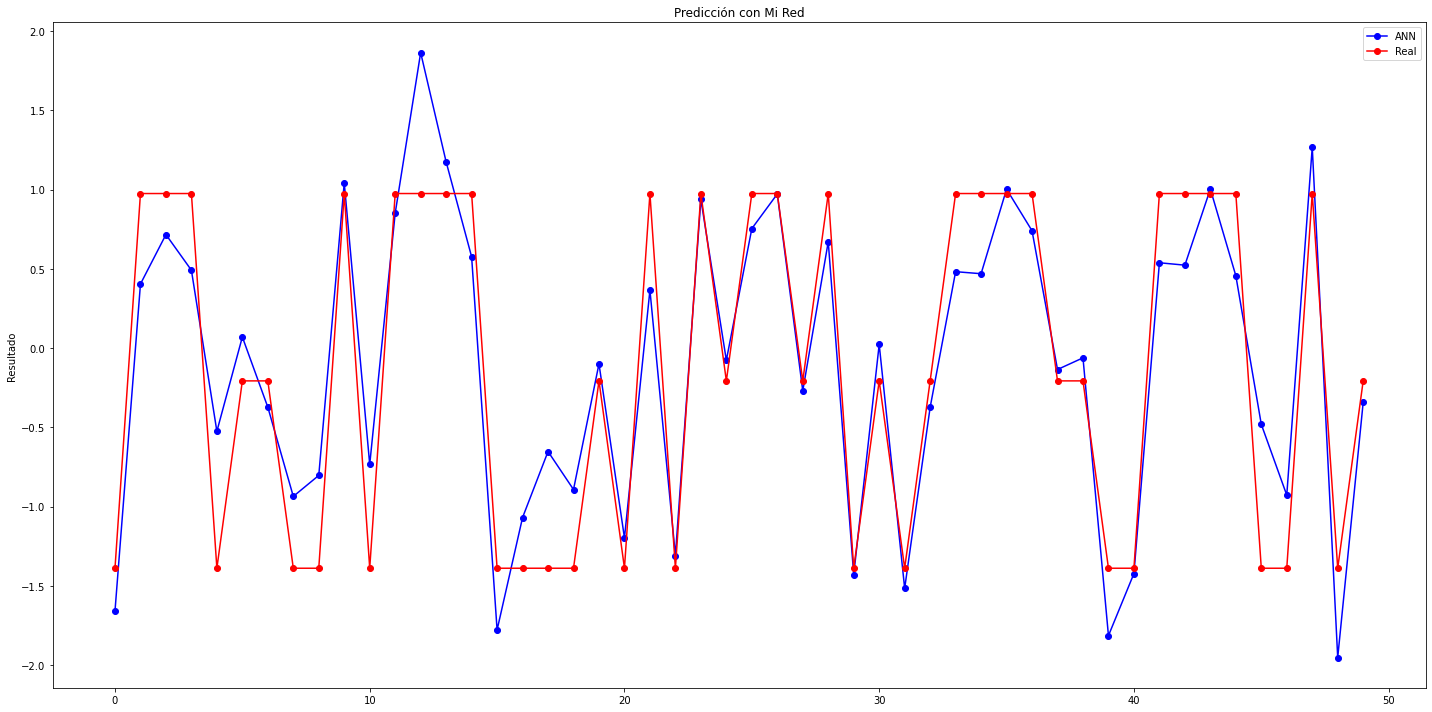

In [40]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(Y[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, Y[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

### Test data

In [41]:
#Dividimos nuestros datos en la características y los valores a predecir
X_n = test.drop(['Resultado'], axis=1)
Y = test['Resultado']
display(X_n.head())
Y.head()

#Escalamos los datos
X_test = scaler.fit_transform(X_n)
display(pd.DataFrame(X_test, columns=X_n.columns))

y_test = (Y - Y.mean())/Y.std()
display(pd.DataFrame(y_test))

,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
656,0.90,1.88,46,2,3,12,11,1,8,0,...,14,10,0,1,2.0,3.0,80.0,93.0,58.0,58.0
382,0.86,1.22,53,3,3,3,8,4,2,0,...,9,19,0,0,0.0,4.0,92.0,100.0,30.0,57.0
652,1.07,1.14,47,7,2,8,9,7,0,1,...,10,14,0,0,3.0,4.0,112.0,75.0,55.0,39.0
1028,2.22,1.76,65,8,4,11,1,6,1,1,...,8,5,0,0,1.0,1.0,160.0,50.0,61.0,14.0
370,1.85,0.71,64,9,4,9,2,8,2,1,...,15,13,0,1,2.0,3.0,118.0,94.0,66.0,39.0


,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,-0.587993,1.018824,-0.454734,-1.047094,-0.502842,1.690095,1.828048,-1.432536,1.311301,-1.111866,...,0.557951,-0.571495,-0.279508,2.828427,0.055263,0.452593,-1.062161,-0.233085,0.249547,0.844780
1,-0.635640,0.158926,0.132529,-0.693508,-0.502842,-0.987326,0.897542,-0.441885,-0.871857,-1.111866,...,-0.722491,1.876082,-0.279508,-0.353553,-1.469995,1.126600,-0.603626,0.056076,-1.168465,0.783744
2,-0.385493,0.054696,-0.370839,0.720838,-0.907855,0.500130,1.207711,0.548766,-1.599576,-0.484737,...,-0.466403,0.516317,-0.279508,-0.353553,0.817892,1.126600,0.160598,-0.976641,0.097617,-0.314913
3,0.984362,0.862479,1.139266,1.074424,-0.097829,1.392604,-1.273640,0.218549,-1.235717,-0.484737,...,-0.978580,-1.931260,-0.279508,-0.353553,-0.707366,-0.895419,1.994736,-2.009358,0.401476,-1.840825
4,0.543626,-0.505541,1.055371,1.428011,-0.097829,0.797621,-0.963471,0.878984,-0.871857,-0.484737,...,0.814040,0.244364,-0.279508,2.828427,0.055263,0.452593,0.389865,-0.191776,0.654693,-0.314913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.599905,-0.661886,0.635897,-1.047094,-0.097829,-0.689835,0.277204,-0.772102,-0.144138,-0.484737,...,1.326217,-0.027589,-0.279508,-0.353553,1.580521,1.126600,1.459779,-0.274393,-0.459459,0.051306
203,0.102890,-1.156979,-0.035260,-1.047094,-1.312868,-0.094852,-0.963471,-1.762753,-0.144138,-0.484737,...,2.094482,0.788270,-0.279508,-0.353553,0.817892,1.800606,0.198809,-0.191776,-0.054313,2.126546
204,0.138625,-0.740059,0.468108,0.720838,0.307184,-0.392343,-0.963471,-0.111668,-0.871857,1.396649,...,-1.234668,1.604129,3.577709,2.828427,1.580521,3.148618,0.886611,-1.183184,0.958552,-0.620095
205,-0.028139,0.002581,-1.293680,-0.339921,0.307184,-0.987326,0.897542,0.218549,2.402880,-0.484737,...,0.301863,-0.571495,-0.279508,-0.353553,-0.707366,0.452593,-1.673540,1.377954,0.249547,2.492765


,Resultado
656,-1.300179
382,1.040143
652,-1.300179
1028,1.040143
370,1.040143
...,...
1116,-1.300179
222,1.040143
1045,1.040143
279,1.040143


In [42]:
y_pred = best_model.predict(X_test, batch_size=1)
y_pred

207/207 [==============================] - 0s 760us/step


array([[-0.72785795],
       [ 0.5876792 ],
       [-0.58058727],
       [ 0.34806377],
       [ 0.9910246 ],
       [-1.0541314 ],
       [-0.19271702],
       [-0.05247316],
       [ 0.3803027 ],
       [ 0.24033919],
       [-0.79220176],
       [ 0.0060232 ],
       [ 0.01902846],
       [ 1.2386113 ],
       [-0.78311443],
       [-1.709633  ],
       [ 0.48135304],
       [-0.085814  ],
       [ 0.9333694 ],
       [ 0.963287  ],
       [-0.67239785],
       [ 0.6039384 ],
       [ 0.484622  ],
       [-0.97495246],
       [ 1.2483983 ],
       [-0.03184679],
       [ 0.5695684 ],
       [-0.79998565],
       [-0.8706547 ],
       [-0.03777191],
       [ 0.72840774],
       [ 0.9951352 ],
       [-1.1901822 ],
       [-0.99890447],
       [-0.16954625],
       [-0.06770054],
       [ 0.51544964],
       [-0.9193022 ],
       [ 0.02877507],
       [ 0.63657343],
       [-1.4861102 ],
       [ 0.62134933],
       [ 1.1403563 ],
       [-0.00326696],
       [-0.03058943],
       [ 1

In [43]:
n,p = X.shape

print('------------ Resultados ------------')
print("Mean Squared Error (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE): %.5f" % mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.5f" % sqrt(mean_squared_error(y_test, y_pred)))

------------ Resultados ------------
Mean Squared Error (MSE): 0.13787
Mean Absolute Error (MAE): 0.29102
Root Mean Squared Error (RMSE): 0.37131


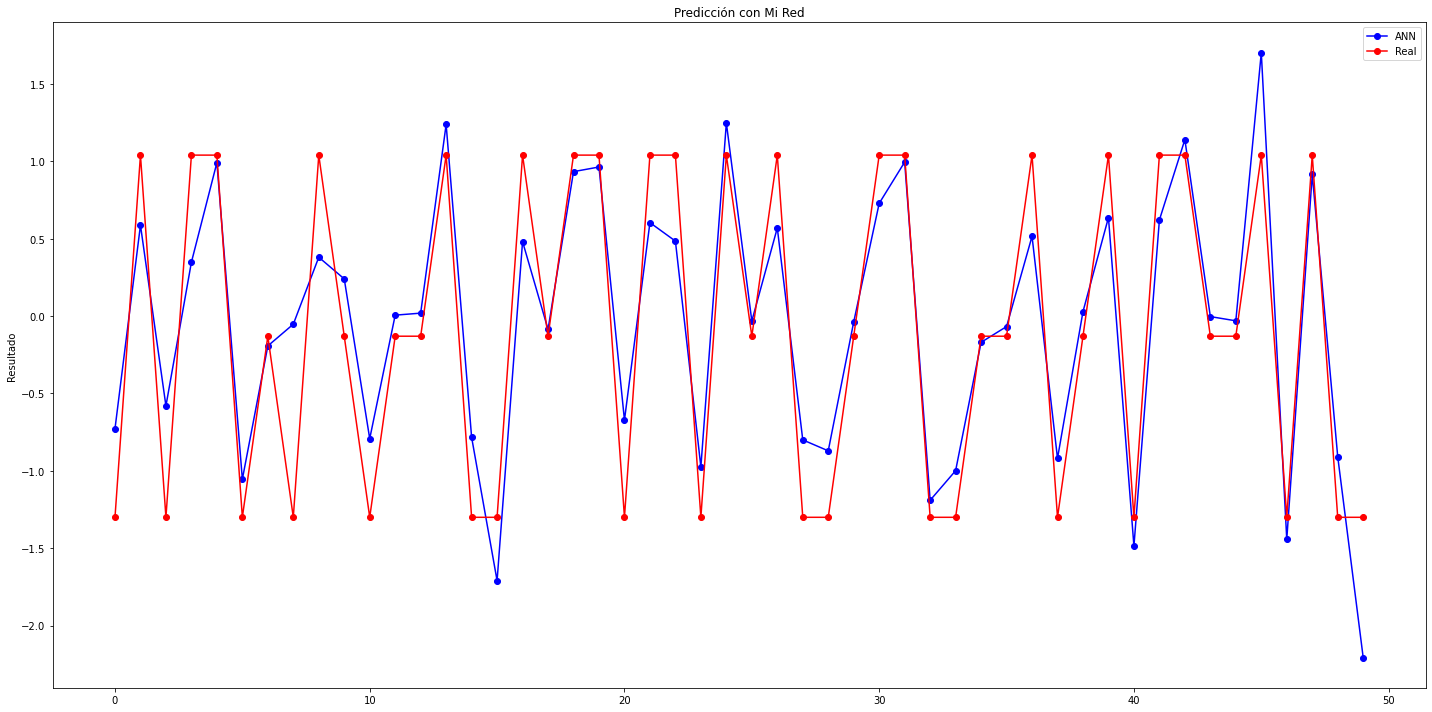

In [44]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='ANN')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Predicción con Mi Red',ylabel=Y.name)
axs.legend()

plt.tight_layout()
plt.show()

### Prediccion

In [77]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook

#pais, liga = "belgica", "jupiler-pro-league"
#pais, liga = "espana", "laliga-ea-sports"
###pais, liga = "espana", "laliga-smartbank"
#pais, liga = "francia", "ligue-1"
###pais, liga = "francia", "ligue-2"
###pais, liga = "inglaterra", "championship"
#pais, liga = "inglaterra", "premier-league"
pais, liga = "italia", "serie-a"
###pais, liga = "italia", "serie-b"
#pais, liga = "paises-bajos", "eredivisie"
#pais, liga = "portugal", "liga-portugal"
###pais, liga = "turquia", "super-lig"
###pais, liga = "colombia", "primera-a"
###pais, liga = "brasil", "brasileirao-serie-a"

version = 1

db_location = f"../data/2023-24/version{version}/proximos/{pais}_{liga}_23-24.csv"

# Se leen los datos, estan separados con ','
data = pd.read_csv(db_location, sep=',', encoding = 'utf-8', na_values = '-')

In [78]:
#columns_to_drop = ['HBS', 'ABS']
columns_to_drop = ['Date', 'HomeTeam', 'AwayTeam', 'HBS', 'ABS', 'HFK', 'AFK', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HClC', 'AClC',
                   'HCrC', 'ACrC', 'HDC', 'ADC', 'Resultado']
df_data = data.drop(columns=columns_to_drop)

In [79]:
# Se observa que no existen valores nulos en las variables
df_data.isnull().sum()

HG      0
AG      0
HxG     0
AxG     0
HP      0
AP      0
HTS     0
ATS     0
HSI     0
ASI     0
HSO     0
ASO     0
HC      0
AC      0
HOFF    0
AOFF    0
HTI     0
ATI     0
HGS     0
AGS     0
HF      0
AF      0
HRC     0
ARC     0
HYC     0
AYC     0
HA      0
AA      0
HDA     0
ADA     0
dtype: int64

In [80]:
df_data.fillna(0, inplace=True)

In [81]:
df_data.shape

(30, 30)

In [82]:
columns_to_drop = ['HG', 'AG', 'HTS', 'ATS', 'AP']
df_data = df_data.drop(columns=columns_to_drop)

In [83]:
#Dividimos nuestros datos en la características y los valores a predecir
X_n = df_data
display(X_n.head())

#Escalamos los datos
X_test = scaler.fit_transform(X_n)
display(pd.DataFrame(X_test, columns=X_n.columns))

,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,1.2,0.8,59.8,5.1,2.5,4.8,5.1,4.5,2.4,1.4,...,12.5,14.4,0.0,0.0,1.4,3.0,129.5,107.5,68.8,42.0
1,1.9,0.9,60.6,5.4,3.8,8.5,5.9,7.2,5.0,2.4,...,8.5,10.6,0.1,0.1,1.9,2.0,112.4,97.9,66.1,43.4
2,0.9,1.8,41.9,3.0,4.4,4.9,6.0,4.2,4.0,1.2,...,11.8,11.1,0.1,0.0,2.6,1.5,85.5,101.6,39.1,40.8
3,1.3,1.1,52.5,3.1,3.4,4.6,5.1,5.0,5.1,2.1,...,11.1,11.1,0.1,0.1,1.9,2.2,114.2,96.5,48.5,43.9
4,1.4,0.8,49.8,6.4,3.1,4.6,3.9,6.8,2.6,2.2,...,11.9,14.1,0.1,0.4,1.8,3.2,109.6,95.9,57.0,32.4


,HxG,AxG,HP,HSI,ASI,HSO,ASO,HC,AC,HOFF,...,HF,AF,HRC,ARC,HYC,AYC,HA,AA,HDA,ADA
0,-0.373056,-0.911967,1.672563,0.554891,-1.410350,-0.558010,0.410033,-0.764955,-1.604269,-0.487598,...,0.533253,1.796034,-1.212678,-0.754829,-1.489885,1.185333,2.564456,1.294262,2.125037,0.301846
1,1.635708,-0.586264,1.807948,0.879178,0.236466,2.194841,1.365451,1.743602,0.903406,1.695678,...,-2.336271,-1.210543,0.242536,0.053916,-0.372471,-0.882109,0.914223,0.145225,1.850204,0.563238
2,-1.233955,2.345057,-1.356666,-1.715118,0.996535,-0.483609,1.484878,-1.043684,-0.061084,-0.924254,...,0.031087,-0.814940,0.242536,-0.754829,1.191908,-1.915830,-1.681758,0.588083,-0.898128,0.077795
3,-0.086090,0.065140,0.437179,-1.607022,-0.270247,-0.706813,0.410033,-0.300408,0.999855,1.040695,...,-0.471080,-0.814940,0.242536,0.053916,-0.372471,-0.468620,1.087931,-0.022342,0.058699,0.656592
4,0.200876,-0.911967,-0.019744,1.960134,-0.650281,-0.706813,-1.023093,1.371964,-1.411371,1.259023,...,0.102825,1.558672,0.242536,2.480154,-0.595954,1.598822,0.644009,-0.094157,0.923914,-1.490558
5,0.487843,-0.911967,-0.967435,-0.526066,-0.903638,1.153221,-0.784238,-0.207498,-0.061084,0.385712,...,0.174563,-0.102857,0.242536,-0.754829,-0.372471,-0.675364,-0.668457,-1.099564,-0.043091,-0.052901
6,0.487843,0.716545,-0.984359,0.987274,0.743179,-1.078820,-1.978510,-0.300408,-0.639779,-0.050943,...,0.891944,0.609227,1.697749,0.053916,-0.372471,-0.055132,-0.427195,-0.022342,-0.725084,-1.079799
7,0.487843,0.716545,0.487948,0.662987,1.249891,-1.227623,-0.425957,-0.207498,1.289202,-0.924254,...,-0.112390,-1.289663,0.242536,0.862662,-0.595954,-0.468620,-0.359641,-0.704583,-0.796337,0.824630
8,-1.520922,-1.237669,-1.238205,0.014413,-1.283672,-0.334806,-1.381374,-1.322412,-1.025575,-1.142581,...,0.820206,1.163070,1.697749,-0.754829,0.074494,-0.675364,-0.089428,-0.010373,-1.519047,-1.677267
9,0.774809,0.065140,-0.645897,-0.417970,0.236466,1.674031,0.051752,0.442869,0.806957,-0.269271,...,0.604991,-0.577579,-1.212678,-0.754829,0.968425,1.185333,-0.494748,-0.201879,-0.195776,0.376529


In [84]:
y_pred = best_model.predict(X_test, batch_size=1)

30/30 [==============================] - 0s 2ms/step


In [85]:
y_pred.tolist()

[[1.3761683702468872],
 [-1.223106861114502],
 [-3.6318094730377197],
 [-2.463486909866333],
 [1.121545433998108],
 [-0.961052417755127],
 [-0.0026460587978363037],
 [-1.4947404861450195],
 [2.419804096221924],
 [0.6186323165893555],
 [1.461710810661316],
 [1.5029598474502563],
 [-0.7690669298171997],
 [1.6460576057434082],
 [-0.11739876866340637],
 [-1.735264778137207],
 [-3.347994565963745],
 [-1.074660062789917],
 [1.678074598312378],
 [-0.1601097285747528],
 [-2.1966044902801514],
 [2.3326685428619385],
 [0.9544265270233154],
 [-3.6116156578063965],
 [-1.501560926437378],
 [-0.2576996982097626],
 [1.2583521604537964],
 [1.733166217803955],
 [1.418492317199707],
 [-3.606882333755493]]

In [86]:
for i in y_pred.tolist()[:29]:
    print ("{:.2f}".format(i[0]).replace('.', ','))

1,38
-1,22
-3,63
-2,46
1,12
-0,96
-0,00
-1,49
2,42
0,62
1,46
1,50
-0,77
1,65
-0,12
-1,74
-3,35
-1,07
1,68
-0,16
-2,20
2,33
0,95
-3,61
-1,50
-0,26
1,26
1,73
1,42


In [87]:
for i in range(len(y_pred.tolist()[:29])):
    home_team = data.iloc[i]["HomeTeam"]
    away_team = data.iloc[i]["AwayTeam"]
    
    print(home_team + " vs " + away_team)
    print(y_pred[i][0])
    ganador = home_team if y_pred[i][0] >= 0.5 else (away_team if y_pred[i][0] <= -0.5 else "ninguno")
    if ganador == "ninguno":
            print("No hay ganador claro. " + str(abs(y_pred[i][0]))[:4])
    else:
        print("Gana " + ganador + " por " + str(abs(y_pred[i][0]))[:4] + " goles")
    print()

Fiorentina vs Torino
1.3761684
Gana Fiorentina por 1.37 goles

Nápoles vs Monza
-1.2231069
Gana Monza por 1.22 goles

Genoa vs Inter
-3.6318095
Gana Inter por 3.63 goles

Lazio vs Frosinone
-2.463487
Gana Frosinone por 2.46 goles

Atalanta vs Lecce
1.1215454
Gana Atalanta por 1.12 goles

Cagliari vs Empoli
-0.9610524
Gana Empoli por 0.96 goles

Udinese vs Bolonia
-0.0026460588
No hay ganador claro. 0.00

AC Milan vs Sassuolo
-1.4947405
Gana Sassuolo por 1.49 goles

Verona vs Salernitana
2.419804
Gana Verona por 2.41 goles

Juventus vs Roma
0.6186323
Gana Juventus por 0.61 goles

Bolonia vs Genoa
1.4617108
Gana Bolonia por 1.46 goles

Inter vs Verona
1.5029598
Gana Inter por 1.50 goles

Frosinone vs Monza
-0.76906693
Gana Monza por 0.76 goles

Lecce vs Cagliari
1.6460576
Gana Lecce por 1.64 goles

Sassuolo vs Fiorentina
-0.11739877
No hay ganador claro. 0.11

Empoli vs AC Milan
-1.7352648
Gana AC Milan por 1.73 goles

Torino vs Nápoles
-3.3479946
Gana Nápoles por 3.34 goles

Udinese vs 